<a href="https://colab.research.google.com/github/sangho24/sogang/blob/main/EC5320_2024_2_Week10_KMEANS_v2_20200572.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EC5320 Week10 codes: K-Means to group colors from an image

2024.11.3.<br>

Author: Hyunjoo Yang (hyang@sogang.ac.kr)<br><br>

This notebook uses Scikit Learn's K-means algorithms.<br><br>

Data source:<br>
ESA's sentinel 2 satellite images in 2020 <br><br>

Codes are from a paper by Jeong and Yang:<br>
https://www.researchgate.net/publication/357418184_Using_maps_to_predict_economic_activity <br><br>

For information on K-Means, refer to:<br>
https://scikit-learn.org/stable/modules/clustering.html <br><br>

Watch the iteration process of K-Means:<br>
https://www.youtube.com/watch?v=5I3Ei69I40s

# 1. Upload files

In [1]:
# image zipfile name
fn = 'clipped_127_37.zip'

# dropbox local save folder name
dir_nm = './pop_data'

In [5]:
!unzip {fn} -d {dir_nm}

Archive:  clipped_127_37.zip
  inflating: ./pop_data/다바8988.png  
  inflating: ./pop_data/다바8988.png.aux.xml  
  inflating: ./pop_data/다바6588.png  
  inflating: ./pop_data/다바6588.png.aux.xml  
  inflating: ./pop_data/다바6585.png  
  inflating: ./pop_data/다바6585.png.aux.xml  
  inflating: ./pop_data/다바6288.png  
  inflating: ./pop_data/다바6288.png.aux.xml  
  inflating: ./pop_data/다바7487.png  
  inflating: ./pop_data/다바7487.png.aux.xml  
  inflating: ./pop_data/다바8888.png  
  inflating: ./pop_data/다바8888.png.aux.xml  
  inflating: ./pop_data/다바8484.png  
  inflating: ./pop_data/다바8484.png.aux.xml  
  inflating: ./pop_data/다바6282.png  
  inflating: ./pop_data/다바6282.png.aux.xml  
  inflating: ./pop_data/다바7983.png  
  inflating: ./pop_data/다바7983.png.aux.xml  
  inflating: ./pop_data/다바7688.png  
  inflating: ./pop_data/다바7688.png.aux.xml  
  inflating: ./pop_data/다바5986.png  
  inflating: ./pop_data/다바5986.png.aux.xml  
  inflating: ./pop_data/다바5981.png  
  inflating: ./pop_data/다바5981.p

In [6]:
!ls

clipped_127_37.zip  pop_data  sample_data


In [7]:
!ls pop_data

다바5634.png	      다바6683.png.aux.xml  다바7778.png	  다바8951.png.aux.xml
다바5634.png.aux.xml  다바6684.png	    다바7778.png.aux.xml  다바8952.png
다바5635.png	      다바6684.png.aux.xml  다바7780.png	  다바8952.png.aux.xml
다바5635.png.aux.xml  다바6685.png	    다바7780.png.aux.xml  다바8953.png
다바5636.png	      다바6685.png.aux.xml  다바7781.png	  다바8953.png.aux.xml
다바5636.png.aux.xml  다바6686.png	    다바7781.png.aux.xml  다바8954.png
다바5637.png	      다바6686.png.aux.xml  다바7782.png	  다바8954.png.aux.xml
다바5637.png.aux.xml  다바6687.png	    다바7782.png.aux.xml  다바8955.png
다바5638.png	      다바6687.png.aux.xml  다바7783.png	  다바8955.png.aux.xml
다바5638.png.aux.xml  다바6688.png	    다바7783.png.aux.xml  다바8956.png
다바5639.png	      다바6688.png.aux.xml  다바7784.png	  다바8956.png.aux.xml
다바5639.png.aux.xml  다바6734.png	    다바7784.png.aux.xml  다바8957.png
다바5640.png	      다바6734.png.aux.xml  다바7785.png	  다바8957.png.aux.xml
다바5640.png.aux.xml  다바6735.png	    다바7785.png.aux.xml  다바8958.png
다바5641.png	      다바6735.png.aux.xml  다바7786.png	  다바895

# 2. Prepare file paths and ground truth

In [8]:
import glob

# grab image file list

img_list = glob.glob(dir_nm + '/*.png')
img_list[0:5]

['./pop_data/다바9787.png',
 './pop_data/다바6078.png',
 './pop_data/다바7061.png',
 './pop_data/다바8048.png',
 './pop_data/다바5638.png']

In [9]:
import os

# test extracting id from an image
os.path.splitext(os.path.basename(img_list[1]))[0]

'다바6078'

In [10]:
# generate a list of ids

file_gid = list(map(lambda x:os.path.splitext(os.path.basename(x))[0], img_list))
file_gid[0:5]

['다바9787', '다바6078', '다바7061', '다바8048', '다바5638']

In [11]:
import pandas as pd

# combine file path and gid

df_img = pd.DataFrame(list(zip(img_list, file_gid)), columns=['img_path', 'gid'])
df_img

,img_path,gid
0,./pop_data/다바9787.png,다바9787
1,./pop_data/다바6078.png,다바6078
2,./pop_data/다바7061.png,다바7061
3,./pop_data/다바8048.png,다바8048
4,./pop_data/다바5638.png,다바5638
...,...,...
2180,./pop_data/다바6687.png,다바6687
2181,./pop_data/다바9570.png,다바9570
2182,./pop_data/다바8157.png,다바8157
2183,./pop_data/다바5742.png,다바5742


In [12]:
df_img.dtypes

,0
img_path,object
gid,object


# 3. Read an image as tabular data (R, G, B)

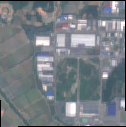

In [13]:
# show a sample image

import cv2
from google.colab.patches import cv2_imshow

img_sample_path = img_list[1]

img_to_show = cv2.imread(img_sample_path)
cv2_imshow(img_to_show)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 99, 114, 118],
        [ 99, 114, 118],
        [112, 116, 124],
        ...,
        [126, 142, 175],
        [142, 150, 177],
        [  0,   0,   0]],

       [[103, 115, 119],
        [103, 115, 119],
        [113, 118, 125],
        ...,
        [128, 143, 175],
        [141, 151, 177],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [111, 114, 116],
        [111, 112, 116],
        ...,
        [139, 140, 147],
        [130, 131, 140],
        [128, 131, 137]],

       [[  0,   0,   0],
        [112, 114, 118],
        [112, 113, 117],
        ...,
        [145, 142, 151],
        [137, 139, 148],
        [136, 137, 145]],

       [[  0,   0,   0],
        [114, 113, 118],
        [112, 113, 117],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
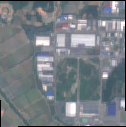

In [14]:
# read image as array

#img_array = cv2.imread(img_sample_path, cv2.IMREAD_UNCHANGED)
img_array = cv2.cvtColor(cv2.imread(img_sample_path), cv2.COLOR_BGR2RGB)
img_array

In [15]:
img_array.shape

(127, 126, 3)

In [16]:
# reshape image (row x column -> long column)
# 이미지 픽셀이 쭉 있는 건데, 1 * n 차원으로 쭉 늘리는 작업


image_tot_rows = img_array.shape[0]*img_array.shape[1]
img_array_reshaped = img_array.reshape(image_tot_rows, 3)

In [17]:
img_array_reshaped.shape
# (16002, 3)에서 3은 각각 RGB 축을 의미함. RGB라는 임의의 공간에 이미지를 위치시킨 것

(16002, 3)

In [18]:
# convert to a pandas dataframe

df_img_raw = pd.DataFrame(img_array_reshaped, columns = ['r','g','b'])
df_img_raw

,r,g,b
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
15997,0,0,0
15998,0,0,0
15999,0,0,0
16000,0,0,0


In [19]:
# scale RGB values by 255

img_array_scaled = img_array_reshaped/255.0
df_img = pd.DataFrame(img_array_scaled, columns = ['r','g','b'])
df_img

,r,g,b
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
15997,0.0,0.0,0.0
15998,0.0,0.0,0.0
15999,0.0,0.0,0.0
16000,0.0,0.0,0.0


# 4. K-means to cluster images

In [20]:
k = 20  # 가장 중요한 하이퍼파라미터
n_init=30  # 랜덤 위치 설정
max_iter=300  # 이동을 몇 번까지 할 것이냐
my_seed = 42

## 4.1 K-Means using Scikit Learn

In [21]:
%%time

from sklearn.cluster import KMeans

kmeans_sk = KMeans(
    n_clusters=k, init='random',
    n_init=n_init, max_iter=max_iter,
    random_state=my_seed
)

kmeans_sk.fit(df_img)  #

colors_sk = kmeans_sk.predict(df_img)  # 특정 점이 어떤 그룹에 속하는지 예측

CPU times: user 5.55 s, sys: 197 ms, total: 5.75 s
Wall time: 6.33 s


In [22]:
colors_sk

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [23]:
colors_sk.shape

(16002,)

In [24]:
centroids_sk  = kmeans_sk.cluster_centers_
centroids_sk
# 각 그룹 중앙의 좌표들

array([[ 5.62247378e-01,  5.61210269e-01,  5.96995162e-01],
       [ 1.66533454e-16, -2.22044605e-16,  2.77555756e-15],
       [ 3.47470963e-01,  4.13737979e-01,  5.86286999e-01],
       [ 4.36459989e-01,  4.97650592e-01,  6.66313372e-01],
       [ 4.39517906e-01,  4.75085113e-01,  5.09847616e-01],
       [ 8.67269985e-01,  8.37871148e-01,  8.62322775e-01],
       [ 3.67947956e-01,  4.26844615e-01,  4.51992017e-01],
       [ 5.21624384e-01,  5.30850293e-01,  5.65430722e-01],
       [ 4.83104892e-01,  5.03045879e-01,  5.42972270e-01],
       [ 5.43504902e-01,  5.14989680e-01,  5.16873065e-01],
       [ 4.85166848e-01,  4.90744315e-01,  4.93837935e-01],
       [ 4.08474576e-01,  4.51551229e-01,  4.64903329e-01],
       [ 7.72643515e-01,  7.51296953e-01,  7.74769667e-01],
       [ 2.79980365e-01,  3.67574791e-01,  4.09626660e-01],
       [ 4.50191757e-01,  4.72097985e-01,  4.71233728e-01],
       [ 6.52635158e-01,  5.64977899e-01,  5.50289017e-01],
       [ 6.89296806e-01,  6.71997404e-01

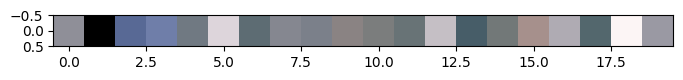

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# show centroid colors

palette = np.array(list(map(tuple, centroids_sk)))[np.newaxis, :, :]

fig, axes = plt.subplots(1,1,figsize=(8,2))

axes.imshow(palette);

In [26]:
# save color groups

df_y_sk = pd.Series(np.squeeze(colors_sk), name='kmeans')
df_y_sk.value_counts(normalize=True)

,proportion
kmeans,
11,0.125109
17,0.094176
14,0.091051
10,0.087864
6,0.080427
8,0.077115
4,0.067054
7,0.065679
0,0.053306


## 4.2 Mini Batch KMeans using Scikit Learn

In [27]:
%%time
# 너무 오래 걸릴 거 같으면 mini Batch를 활용할 수 있음
from sklearn.cluster import MiniBatchKMeans

kmeans_mini = MiniBatchKMeans(
    n_clusters=k, init='random',
    n_init=n_init, max_iter=max_iter,
    random_state=my_seed
)

kmeans_mini.fit(df_img)

colors_mini = kmeans_mini.predict(df_img)

CPU times: user 45.1 ms, sys: 0 ns, total: 45.1 ms
Wall time: 45.1 ms


In [28]:
colors_mini

array([7, 7, 7, ..., 7, 7, 7], dtype=int32)

In [29]:
colors_mini.shape

(16002,)

In [30]:
centroids_mini  = kmeans_mini.cluster_centers_
centroids_mini

array([[0.41615592, 0.4593558 , 0.50087276],
       [0.56712074, 0.50293086, 0.51230134],
       [0.78191824, 0.7627451 , 0.78826304],
       [0.5075951 , 0.52163651, 0.57071617],
       [0.34521446, 0.41389679, 0.44025678],
       [0.47460186, 0.47810458, 0.47809537],
       [0.49243418, 0.49832826, 0.51168268],
       [0.        , 0.        , 0.        ],
       [0.37852562, 0.43464589, 0.46508057],
       [0.56558824, 0.54605882, 0.55090196],
       [0.55674245, 0.56294358, 0.60686275],
       [0.62097507, 0.60058128, 0.63186377],
       [0.41185874, 0.45027688, 0.45767422],
       [0.40257194, 0.46643748, 0.63333333],
       [0.91669431, 0.88654672, 0.900319  ],
       [0.50645298, 0.51762885, 0.53812299],
       [0.45409543, 0.48628417, 0.51684053],
       [0.4386191 , 0.47249732, 0.47244959],
       [0.69237355, 0.67124359, 0.70237302],
       [0.29833641, 0.38372959, 0.41693311]])

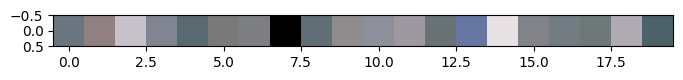

In [31]:
import matplotlib.pyplot as plt

# show centroid colors

palette = np.array(list(map(tuple, centroids_mini)))[np.newaxis, :, :]

fig, axes = plt.subplots(1,1,figsize=(8,2))

axes.imshow(palette)

In [32]:
# save color groups

df_y_mini = pd.Series(np.squeeze(colors_mini), name='mini batch')
df_y_mini.value_counts(normalize=True)

,proportion
mini batch,
4,0.090239
12,0.083427
19,0.081115
17,0.076740
5,0.067804
16,0.066304
8,0.064117
6,0.062555
3,0.055306


# 5. Compare results

In [33]:
# concat df together

df_final = pd.concat([df_img_raw, df_y_sk, df_y_mini], axis=1)
df_final

,r,g,b,kmeans,mini batch
0,0,0,0,1,7
1,0,0,0,1,7
2,0,0,0,1,7
3,0,0,0,1,7
4,0,0,0,1,7
...,...,...,...,...,...
15997,0,0,0,1,7
15998,0,0,0,1,7
15999,0,0,0,1,7
16000,0,0,0,1,7


# 6. Show clustered images

In [34]:
X_sk_seg = y_sk_centroids_conv_to_rgb[colors_sk].reshape(img_to_show.shape) # actual RGB vals -> centroid vals
X_mini_seg = y_mini_centroids_conv_to_rgb[colors_mini].reshape(img_to_show.shape) # actual RGB vals -> centroid vals

NameError: name 'y_sk_centroids_conv_to_rgb' is not defined

NameError: name 'X_sk_seg' is not defined

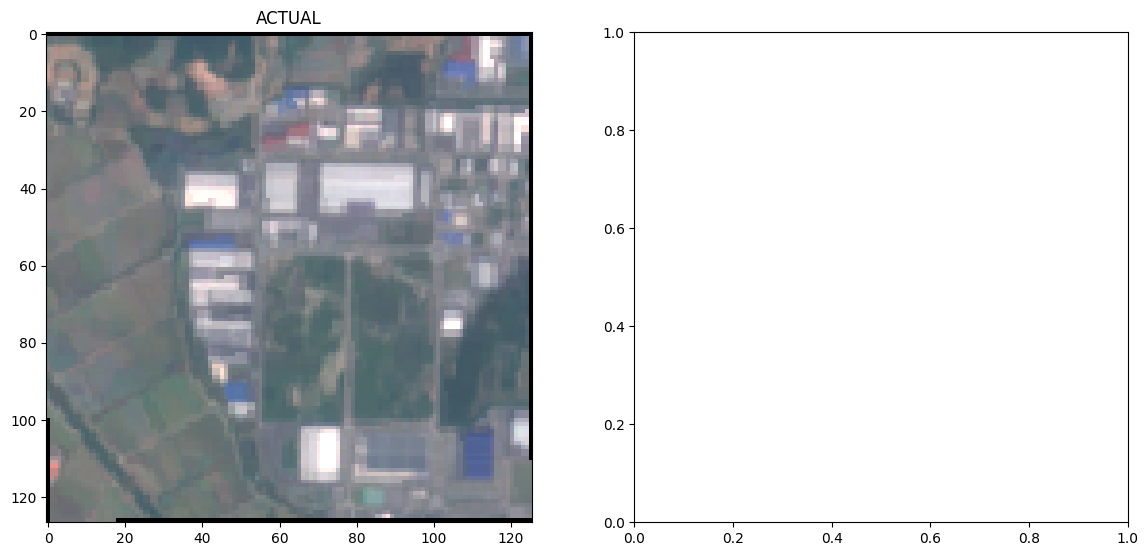

In [35]:
plt.rcParams['figure.figsize'] = [14, 14]
img_to_show = cv2.cvtColor(cv2.imread(img_sample_path), cv2.COLOR_BGR2RGB)

plt.subplot(2, 2, 1)                # Actual
plt.imshow(img_to_show)
plt.title('ACTUAL')

plt.subplot(2, 2, 2)                # Kmeans
plt.imshow(X_sk_seg)
plt.title('Kmeans')

plt.subplot(2, 2, 3)                # Mini Batch
plt.imshow(X_mini_seg)
plt.title('Mini Batch')


plt.tight_layout()
plt.show();